# Método Runge-Kutta 4

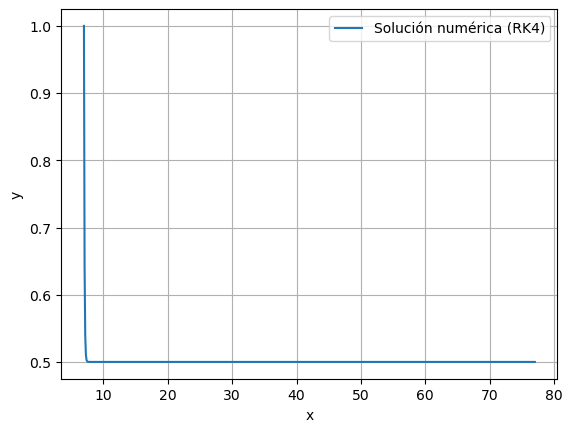

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def rk4(f, x0, y0, x_end, h):
    # Number of steps
    n_steps = int((x_end - x0) / h)
    
    # Arrays to store the values of x and y
    x = np.zeros(n_steps + 1)
    y = np.zeros(n_steps + 1)
    
    # Initial values
    x[0] = x0
    y[0] = y0
    
    # Iteration using RK4 method
    for i in range(n_steps):
        k1 = h * f(x[i], y[i])
        k2 = h * f(x[i] + 0.5 * h, y[i] + 0.5 * k1)
        k3 = h * f(x[i] + 0.5 * h, y[i] + 0.5 * k2)
        k4 = h * f(x[i] + h, y[i] + k3)
        
        y[i + 1] = y[i] + (1/6) * (k1 + 2 * k2 + 2 * k3 + k4)
        x[i + 1] = x[i] + h
    
    return x, y

# Ejemplo de uso
def f(x, y):
    return -2 * x * y + x  # Ecuación diferencial: y' = -2xy

# Condiciones iniciales
x0 = 7
y0 = 1
x_end = 77
h = 0.1

# Solución numérica usando RK4
x, y = rk4(f, x0, y0, x_end, h)

# Graficar los resultados
plt.plot(x, y, label='Solución numérica (RK4)')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.show()


# Flujo de un Fluido Incompresible en una Tubería

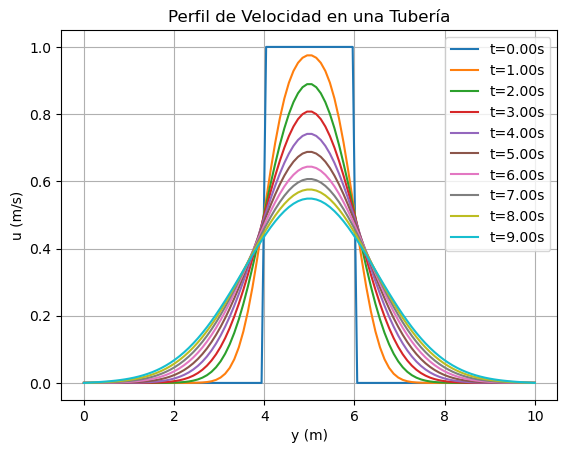

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros del problema
nu = 0.1  # Viscosidad cinemática
L = 10.0    # Longitud de la tubería (en dirección radial)
N = 100    # Número de puntos de discretización en la dirección radial
dy = L / (N - 1)  # Paso espacial
y = np.linspace(0, L, N)

# Condiciones iniciales
u0 = np.zeros(N)  # Velocidad inicial (fluido en reposo)
u0[int(0.4 * N):int(0.6 * N)] = 1.0  # Perfil de velocidad inicial

# Parámetros de tiempo
dt = 0.001  # Paso temporal
t_end = 10.0  # Tiempo final
t = np.arange(0, t_end, dt)

# Función que define la ecuación de difusión de velocidad
def diffusion(u, t, nu, dy):
    dudt = np.zeros_like(u)
    dudt[1:-1] = nu * (u[2:] - 2 * u[1:-1] + u[:-2]) / dy**2
    return dudt

# Método de Runge-Kutta de cuarto orden para resolver la ecuación diferencial
def rk4(u, t, dt, nu, dy):
    n = len(t)
    u_sol = np.zeros((n, len(u)))
    u_sol[0] = u
    
    for i in range(1, n):
        k1 = diffusion(u_sol[i-1], t[i-1], nu, dy) * dt
        k2 = diffusion(u_sol[i-1] + 0.5 * k1, t[i-1] + 0.5 * dt, nu, dy) * dt
        k3 = diffusion(u_sol[i-1] + 0.5 * k2, t[i-1] + 0.5 * dt, nu, dy) * dt
        k4 = diffusion(u_sol[i-1] + k3, t[i-1] + dt, nu, dy) * dt
        u_sol[i] = u_sol[i-1] + (k1 + 2*k2 + 2*k3 + k4) / 6
    
    return u_sol

# Resolver la ecuación usando RK4
u_sol = rk4(u0, t, dt, nu, dy)

# Graficar los resultados
for i in range(0, len(t), len(t) // 10):
    plt.plot(y, u_sol[i], label=f't={t[i]:.2f}s')

plt.xlabel('y (m)')
plt.ylabel('u (m/s)')
plt.title('Perfil de Velocidad en una Tubería')
plt.legend()
plt.grid(True)
plt.show()


# Trayectorias orbitales de tres cuerpos en interacción gravitacional.
## Trayectorias Orbitales de la Tierra, la Luna y el Sol

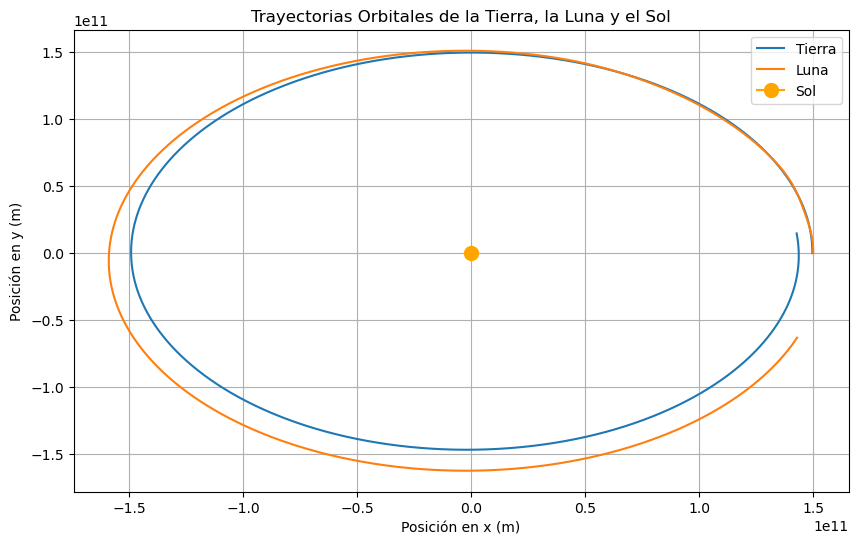

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp  # Importar la función solve_ivp de SciPy

# Definición de constantes
G = 6.67430e-11  # Constante de gravitación universal (m^3 kg^-1 s^-2)
M_sun = 1.989e30  # Masa del Sol (kg)
M_earth = 5.972e24  # Masa de la Tierra (kg)
M_moon = 7.342e22  # Masa de la Luna (kg)

# Función que define el sistema de ecuaciones diferenciales para RK4
def three_body_system(t, y):
    x_earth, y_earth, vx_earth, vy_earth, x_moon, y_moon, vx_moon, vy_moon = y

    # Distancias entre cuerpos
    r_sun_earth = np.sqrt((x_earth)**2 + (y_earth)**2)
    r_sun_moon = np.sqrt((x_moon)**2 + (y_moon)**2)
    r_earth_moon = np.sqrt((x_earth - x_moon)**2 + (y_earth - y_moon)**2)

    # Aceleraciones gravitacionales
    ax_earth = -G * M_sun * x_earth / r_sun_earth**3 - G * M_moon * (x_earth - x_moon) / r_earth_moon**3
    ay_earth = -G * M_sun * y_earth / r_sun_earth**3 - G * M_moon * (y_earth - y_moon) / r_earth_moon**3

    ax_moon = -G * M_sun * x_moon / r_sun_moon**3 + G * M_earth * (x_earth - x_moon) / r_earth_moon**3
    ay_moon = -G * M_sun * y_moon / r_sun_moon**3 + G * M_earth * (y_earth - y_moon) / r_earth_moon**3

    # Derivadas del estado
    dydt = [vx_earth, vy_earth, ax_earth, ay_earth, vx_moon, vy_moon, ax_moon, ay_moon]
    return dydt

# Condiciones iniciales y tiempo
y0 = [1.496e11, 0, 0, 2.978e4, 1.496e11 + 3.844e8, 0, 0, 3.075e4]  # [x_earth, y_earth, vx_earth, vy_earth, x_moon, y_moon, vx_moon, vy_moon]
t = np.linspace(0, 31536000, 10000)  # Un año en segundos

# Resolver el sistema de ecuaciones usando RK4
sol = solve_ivp(three_body_system, [t[0], t[-1]], y0, t_eval=t, method='RK45')

# Graficar las trayectorias
plt.figure(figsize=(10, 6))
plt.plot(sol.y[0], sol.y[1], label='Tierra')
plt.plot(sol.y[4], sol.y[5], label='Luna')
plt.plot([0], [0], marker='o', markersize=10, color='orange', label='Sol')
plt.xlabel('Posición en x (m)')
plt.ylabel('Posición en y (m)')
plt.title('Trayectorias Orbitales de la Tierra, la Luna y el Sol')
plt.legend()
plt.grid(True)
plt.show()


# Evolución temporal de un paquete de ondas cuánticas.

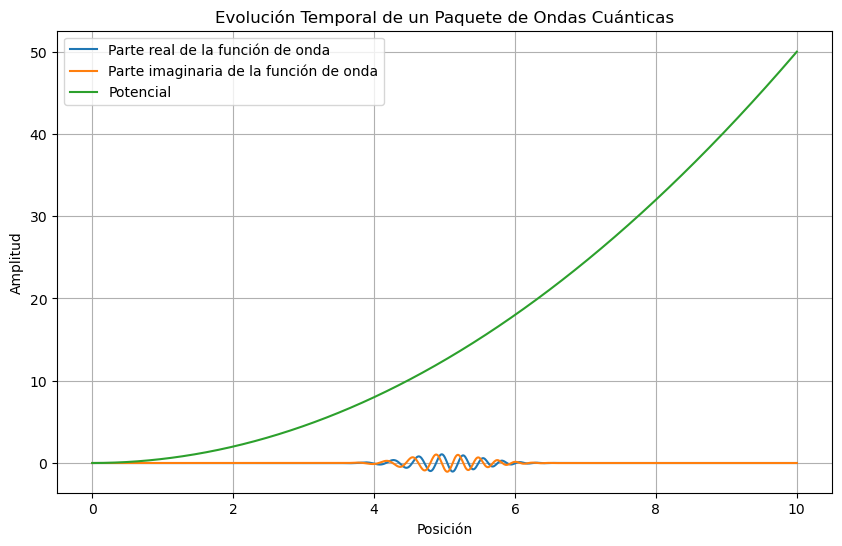

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros del problema
L = 10.0  # Longitud de la región espacial (en unidades arbitrarias)
N = 1000  # Número de puntos en la discretización espacial
dx = L / N  # Paso espacial
x = np.linspace(0, L, N)  # Array de posiciones

# Parámetros de la función de onda inicial
x0 = L / 2  # Posición central del paquete de ondas
k0 = 5.0  # Número de onda inicial del paquete de ondas
sigma = 0.5  # Ancho del paquete de ondas

# Función de onda inicial
def initial_wave_function(x):
    return np.exp(-0.5 * ((x - x0) / sigma)**2) * np.exp(1j * k0 * x)

# Potencial
def potential(x):
    return 0.5 * x**2  # Potencial armónico simple

# Evolución temporal usando RK4
def evolve_wave_function(psi, V, dt, dx):
    # Operador laplaciano en el espacio real
    laplacian = np.fft.fft(np.fft.ifftshift(psi)) * (2 * np.pi / L)**2
    laplacian = np.fft.ifftshift(np.fft.ifft(laplacian))
    
    k1 = -1j * dt * (V * psi + 0.5 * laplacian)
    k2 = -1j * dt * (V * (psi + 0.5 * k1) + 0.5 * laplacian)
    k3 = -1j * dt * (V * (psi + 0.5 * k2) + 0.5 * laplacian)
    k4 = -1j * dt * (V * (psi + k3) + 0.5 * laplacian)
    return psi + (k1 + 2 * k2 + 2 * k3 + k4) / 6

# Condiciones iniciales y parámetros de la simulación
psi = initial_wave_function(x)
V = potential(x)
dt = 0.01  # Paso temporal
steps = 500  # Número de pasos temporales

# Evolución temporal de la función de onda
for _ in range(steps):
    psi = evolve_wave_function(psi, V, dt, dx)

# Graficar la función de onda y el potencial
plt.figure(figsize=(10, 6))
plt.plot(x, np.real(psi), label='Parte real de la función de onda')
plt.plot(x, np.imag(psi), label='Parte imaginaria de la función de onda')
plt.plot(x, V, label='Potencial')
plt.xlabel('Posición')
plt.ylabel('Amplitud')
plt.title('Evolución Temporal de un Paquete de Ondas Cuánticas')
plt.legend()
plt.grid(True)
plt.show()


# Órbitas de galaxias espirales

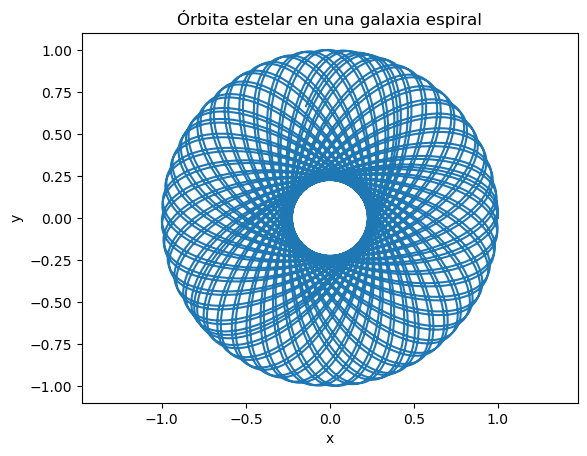

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Constantes
G = 1  # Constante gravitacional, en unidades arbitrarias
M = 10  # Masa de la galaxia, en unidades arbitrarias
b = 0.5  # Parámetro de escala, en unidades arbitrarias

# Potencial de Plummer
def plummer_potential(x, y):
    r = np.sqrt(x**2 + y**2)
    return -G * M / np.sqrt(r**2 + b**2)

# Derivadas del potencial de Plummer
def acceleration(x, y):
    r = np.sqrt(x**2 + y**2)
    factor = G * M / (r**2 + b**2)**(3/2)
    ax = -factor * x
    ay = -factor * y
    return ax, ay

# Método de Runge-Kutta de 4to orden para sistemas de ecuaciones
def rk4_step(f, r, v, dt):
    k1_r = dt * v
    k1_v = dt * np.array(f(*r))
    
    k2_r = dt * (v + 0.5 * k1_v)
    k2_v = dt * np.array(f(*(r + 0.5 * k1_r)))
    
    k3_r = dt * (v + 0.5 * k2_v)
    k3_v = dt * np.array(f(*(r + 0.5 * k2_r)))
    
    k4_r = dt * (v + k3_v)
    k4_v = dt * np.array(f(*(r + k3_r)))
    
    r_next = r + (k1_r + 2*k2_r + 2*k3_r + k4_r) / 6
    v_next = v + (k1_v + 2*k2_v + 2*k3_v + k4_v) / 6
    
    return r_next, v_next

# Configuración de la simulación
dt = 0.01
steps = 10000
x0, y0 = 1.0, 0.0  # Posición inicial
vx0, vy0 = 0.0, 1.0  # Velocidad inicial (orbital circular)

# Arreglos para almacenar los resultados
x = np.zeros(steps)
y = np.zeros(steps)
vx = np.zeros(steps)
vy = np.zeros(steps)

x[0], y[0] = x0, y0
vx[0], vy[0] = vx0, vy0

# Simulación del movimiento orbital
for i in range(steps - 1):
    r = np.array([x[i], y[i]])
    v = np.array([vx[i], vy[i]])
    
    r_next, v_next = rk4_step(acceleration, r, v, dt)
    
    x[i+1], y[i+1] = r_next
    vx[i+1], vy[i+1] = v_next

# Graficar la órbita estelar
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Órbita estelar en una galaxia espiral')
plt.axis('equal')
plt.show()

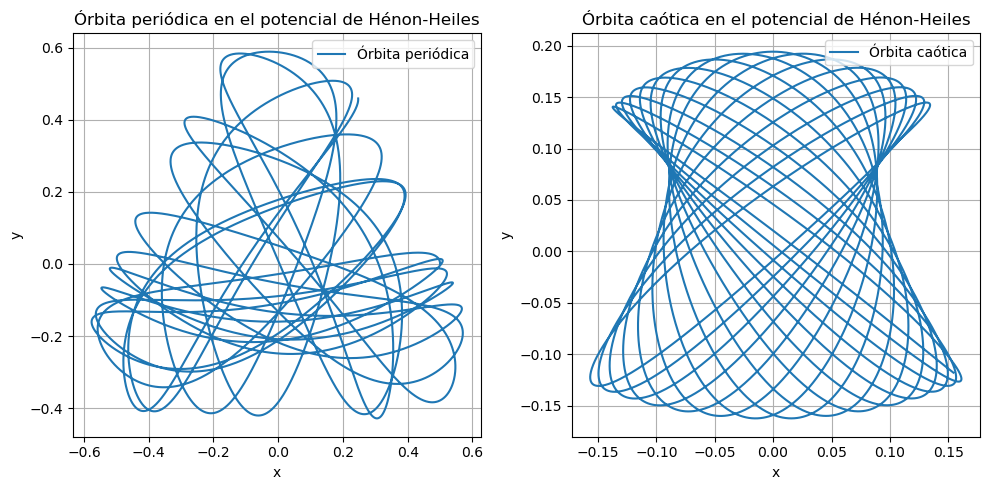

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Definir las constantes
dt = 0.01  # Paso de tiempo
num_steps = 10000  # Número de pasos de tiempo
a = 0.01  # Parámetro del potencial

# Función que define las ecuaciones diferenciales para el potencial de Hénon-Heiles
def f(t, y):
    x, px, y, py = y
    dxdt = px
    dpxdt = -x - 2 * x * y
    dydt = py
    dpydt = -y - (x**2 - a) + y**2
    return [dxdt, dpxdt, dydt, dpydt]

# Método de Runge-Kutta de cuarto orden
def runge_kutta(t, y, dt, f):
    k1 = np.array(f(t, y)) * dt
    k2 = np.array(f(t + dt/2, y + k1/2)) * dt
    k3 = np.array(f(t + dt/2, y + k2/2)) * dt
    k4 = np.array(f(t + dt, y + k3)) * dt
    return y + (k1 + 2*k2 + 2*k3 + k4) / 6

# Condiciones iniciales para una órbita periódica
x0 = 0.5
px0 = 0.0
y0 = 0.0
py0 = np.sqrt(2 * a) * (1 - x0**2 / 2)

# Condiciones iniciales para una órbita caótica
x0_chaotic = 0.1
px0_chaotic = 0.1
y0_chaotic = 0.1
py0_chaotic = 0.1

# Almacenar posiciones para las órbitas
posiciones_per = [[x0, px0, y0, py0]]
posiciones_chaotic = [[x0_chaotic, px0_chaotic, y0_chaotic, py0_chaotic]]

# Simular las órbitas periódica y caótica
for i in range(num_steps):
    t = i * dt
    pos_per = runge_kutta(t, posiciones_per[-1], dt, f)
    pos_chaotic = runge_kutta(t, posiciones_chaotic[-1], dt, f)
    posiciones_per.append(pos_per)
    posiciones_chaotic.append(pos_chaotic)

# Convertir las listas en arrays para facilitar el cálculo y la graficación
posiciones_per = np.array(posiciones_per)
posiciones_chaotic = np.array(posiciones_chaotic)

# Graficar las órbitas
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(posiciones_per[:, 0], posiciones_per[:, 2], label='Órbita periódica')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Órbita periódica en el potencial de Hénon-Heiles')
plt.legend()
plt.grid(True)
plt.subplot(1, 2, 2)
plt.plot(posiciones_chaotic[:, 0], posiciones_chaotic[:, 2], label='Órbita caótica')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Órbita caótica en el potencial de Hénon-Heiles')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

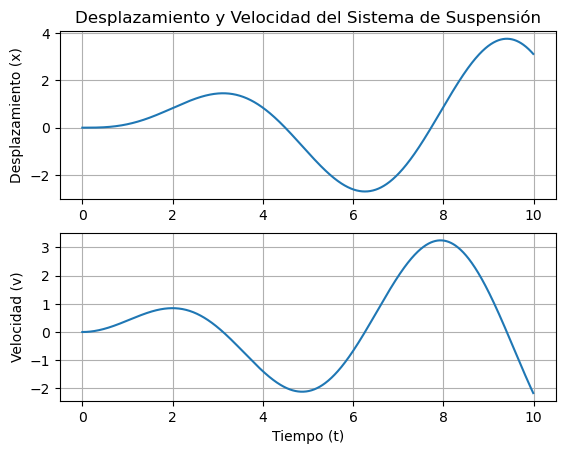

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def rk4_step(f, y, t, dt):
    k1 = f(y, t)
    k2 = f(y + 0.5 * dt * k1, t + 0.5 * dt)
    k3 = f(y + 0.5 * dt * k2, t + 0.5 * dt)
    k4 = f(y + dt * k3, t + dt)
    return y + (dt / 6.0) * (k1 + 2*k2 + 2*k3 + k4)

# Definición de las ecuaciones diferenciales
def suspension_system(y, t):
    x, v = y
    dxdt = v
    dvdt = (F(t) - c * v - k * x) / m
    return np.array([dxdt, dvdt])

# Parámetros del sistema
m = 1.0   # masa
c = 0.1   # coeficiente de amortiguamiento
k = 1.0   # rigidez del resorte

# Fuerza aplicada (puede ser una función del tiempo)
def F(t):
    return 1.0 * np.sin(t)  # fuerza sinusoidal como ejemplo

# Condiciones iniciales
x0 = 0.0  # desplazamiento inicial
v0 = 0.0  # velocidad inicial
y0 = np.array([x0, v0])

# Parámetros de la simulación
t0 = 0.0    # tiempo inicial
tf = 10.0   # tiempo final
dt = 0.01   # paso de tiempo

# Integración usando RK4
t_values = np.arange(t0, tf, dt)
y_values = np.zeros((len(t_values), 2))
y = y0
for i, t in enumerate(t_values):
    y_values[i] = y
    y = rk4_step(suspension_system, y, t, dt)

# Graficar los resultados
x_values = y_values[:, 0]
v_values = y_values[:, 1]

plt.figure()
plt.subplot(2, 1, 1)
plt.plot(t_values, x_values)
plt.title('Desplazamiento y Velocidad del Sistema de Suspensión')
plt.ylabel('Desplazamiento (x)')
plt.grid(True)
plt.subplot(2, 1, 2)
plt.plot(t_values, v_values)
plt.xlabel('Tiempo (t)')
plt.ylabel('Velocidad (v)')
plt.grid(True)
plt.show()

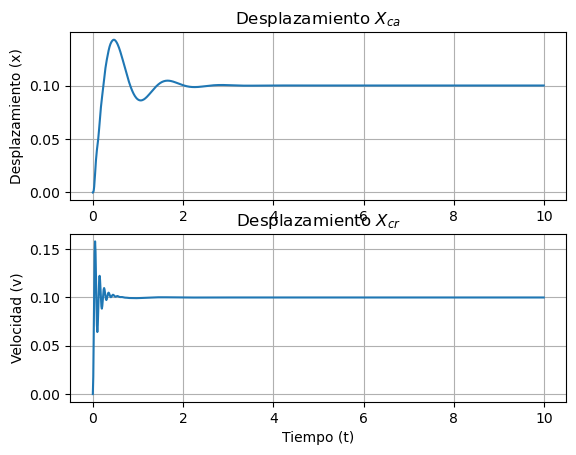

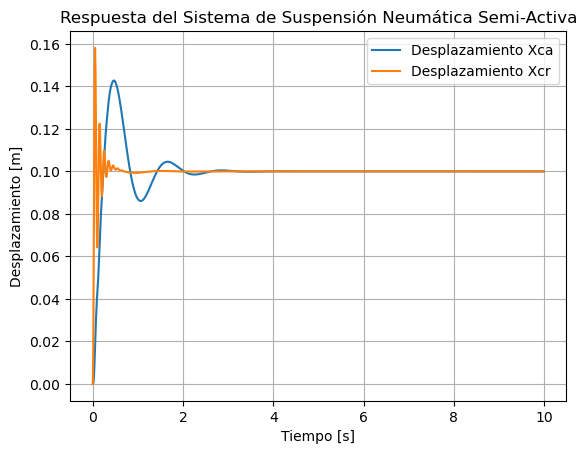

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros del sistema
Mca = 250  # Masa del conjunto conductor-asiento [kg]
Mcr = 50   # Masa del conjunto caucho-rin [kg]
Ke = 8000  # Constante de elasticidad de la bobina [N/m]
Ba = 1000  # Coeficiente de amortiguación [Ns/m]
Kc = 200000  # Constante de elasticidad del caucho [N/m]
Fa = 0    # Fuerza de control activa [N]
R = 0.1   # Perturbación de entrada de la vía [m]

# Ecuaciones diferenciales del sistema
def f(t, y):
    Xca, Yca, Xcr, Ycr = y
    dXca_dt = Yca
    dXcr_dt = Ycr
    dYca_dt = (Fa + Ba * (Ycr - Yca) + Ke * (Xcr - Xca)) / Mca
    dYcr_dt = (Kc * (R - Xcr) - Ke * (Xcr - Xca) - Ba * (Ycr - Yca) - Fa) / Mcr
    return np.array([dXca_dt, dYca_dt, dXcr_dt, dYcr_dt])

# Método de Runge-Kutta de cuarto orden
def rk4_step(f, t, y, h):
    k1 = h * f(t, y)
    k2 = h * f(t + 0.5*h, y + 0.5*k1)
    k3 = h * f(t + 0.5*h, y + 0.5*k2)
    k4 = h * f(t + h, y + k3)
    return y + (k1 + 2*k2 + 2*k3 + k4) / 6

# Condiciones iniciales
y0 = np.array([0, 0, 0, 0])  # [Xca, Yca, Xcr, Ycr]
t0 = 0
tf = 10
h = 0.01  # Tamaño de paso

# Solución numérica
t = np.arange(t0, tf, h)
y = np.zeros((len(t), len(y0)))
y[0] = y0

for i in range(1, len(t)):
    y[i] = rk4_step(f, t[i-1], y[i-1], h)

# Graficar resultados
plt.figure()
plt.subplot(2, 1, 1)
plt.plot(t, y[:, 0])
plt.title('Desplazamiento $X_{ca}$')
plt.ylabel('Desplazamiento (x)')
plt.grid(True)
plt.subplot(2, 1, 2)
plt.plot(t, y[:, 2])
plt.title('Desplazamiento $X_{cr}$')
plt.xlabel('Tiempo (t)')
plt.ylabel('Velocidad (v)')
plt.grid(True)
plt.show()
plt.plot(t, y[:, 0], label='Desplazamiento Xca')
plt.plot(t, y[:, 2], label='Desplazamiento Xcr')
plt.xlabel('Tiempo [s]')
plt.ylabel('Desplazamiento [m]')
plt.legend()
plt.title('Respuesta del Sistema de Suspensión Neumática Semi-Activa')
plt.grid(True)
plt.show()


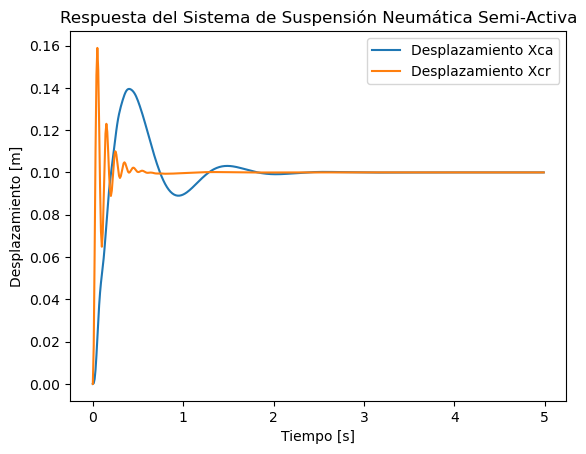

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros del sistema
Mca = 200  # Masa del conjunto conductor-asiento [kg]
Mcr = 50   # Masa del conjunto caucho-rin [kg]
Ke = 8000  # Constante de elasticidad de la bobina [N/m]
Ba = 1000  # Coeficiente de amortiguación [Ns/m]
Kc = 200000  # Constante de elasticidad del caucho [N/m]
Fa = 0    # Fuerza de control activa [N]
R = 0.1   # Perturbación de entrada de la vía [m]

# Ecuaciones diferenciales del sistema
def f(t, y):
    Xca, Yca, Xcr, Ycr = y
    dXca_dt = Yca
    dXcr_dt = Ycr
    dYca_dt = (Fa + Ba * (Ycr - Yca) + Ke * (Xcr - Xca)) / Mca
    dYcr_dt = (Kc * (R - Xcr) - Ke * (Xcr - Xca) - Ba * (Ycr - Yca) - Fa) / Mcr
    return np.array([dXca_dt, dYca_dt, dXcr_dt, dYcr_dt])

# Método de Runge-Kutta de cuarto orden
def rk4_step(f, t, y, h):
    k1 = h * f(t, y)
    k2 = h * f(t + 0.5*h, y + 0.5*k1)
    k3 = h * f(t + 0.5*h, y + 0.5*k2)
    k4 = h * f(t + h, y + k3)
    return y + (k1 + 2*k2 + 2*k3 + k4) / 6

# Condiciones iniciales
y0 = np.array([0, 0, 0, 0])  # [Xca, Yca, Xcr, Ycr]
t0 = 0
tf = 5
h = 0.01  # Tamaño de paso

# Solución numérica
t = np.arange(t0, tf, h)
y = np.zeros((len(t), len(y0)))
y[0] = y0

for i in range(1, len(t)):
    y[i] = rk4_step(f, t[i-1], y[i-1], h)

# Graficar resultados
plt.figure()
plt.plot(t, y[:, 0], label='Desplazamiento Xca')
plt.plot(t, y[:, 2], label='Desplazamiento Xcr')
plt.xlabel('Tiempo [s]')
plt.ylabel('Desplazamiento [m]')
plt.legend()
plt.title('Respuesta del Sistema de Suspensión Neumática Semi-Activa')
plt.show()
